/opt/anaconda3/envs/tora/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)



782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.6226 - binary_crossentropy: 0.6538 - loss: 0.6538
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.7024 - binary_crossentropy: 0.5704 - loss: 0.5704

scores_sgd:  0.6537606716156006
scores_msgd:  0.5685209631919861


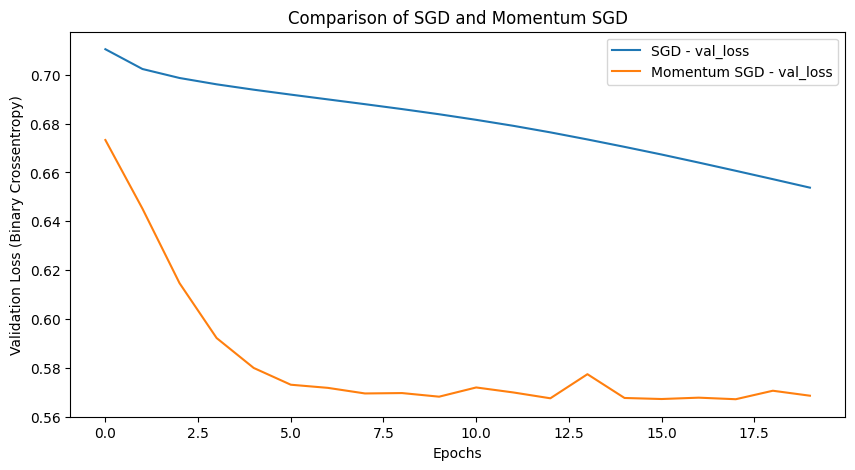

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):
    
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
    
    return results
    
'''
1. 모멘텀(momentum)을 적용/비적용 할 하나의 모델을 자유롭게 생성합니다.
'''
    
def Momentum_model(word_num):
    
    model = tf.keras.Sequential([tf.keras.layers.Dense(32, input_shape = (word_num,), activation = 'relu') ,
    tf.keras.layers.Dense(32, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')])
    
    return model

'''
2. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. Momentum_model 함수를 이용해 
           두 모델을 불러옵니다. 모두 동일한 모델입니다.
   
   Step02. 두 모델의 손실 함수, 최적화 알고리즘, 
           평가 방법을 설정합니다.
   
   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 두 모델을 각각 학습시킵니다. 
           검증용 데이터도 설정해주세요.
           두 모델 모두 'epochs'는 20, 'batch_size'는
           500으로 설정합니다.
   
   Step05. 학습된 두 모델을 테스트하고 
           binary crossentropy 값을 출력합니다. 
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''

def plot_history(history_dict, title):
    plt.figure(figsize=(10, 5))
    for label, history in history_dict.items():
        plt.plot(history.history['val_binary_crossentropy'], label=f"{label} - val_loss")
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss (Binary Crossentropy)')
    plt.legend()
    plt.show()    


def main():
    
    word_num = 100
    data_num = 25000
    
    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.
    
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)
    
    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)
    train_labels = np.expand_dims(train_labels, axis=-1)
    test_labels = np.expand_dims(test_labels, axis=-1)

    sgd_model = Momentum_model(word_num)   # 모멘텀을 사용하지 않을 모델입니다.
    msgd_model = Momentum_model(word_num)  # 모멘텀을 사용할 모델입니다.
    
    sgd_opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0)
    sgd_model.compile(loss = 'binary_crossentropy',
    optimizer = sgd_opt,
    metrics = ['accuracy', 'binary_crossentropy'])
    
    msgd_opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
    msgd_model.compile(loss = 'binary_crossentropy',
    optimizer = msgd_opt ,
    metrics = ['accuracy', 'binary_crossentropy'])
    
    sgd_model.summary()
    msgd_model.summary()
    
    sgd_history = sgd_model.fit(train_data, train_labels, 
    epochs =20, batch_size = 500 , validation_data = (test_data, test_labels) , verbose = 0)
    print('\n')
    msgd_history = msgd_model.fit(train_data, train_labels, 
    epochs =20, batch_size = 500 , validation_data = (test_data, test_labels) , verbose = 0)
    
    scores_sgd = sgd_model.evaluate(test_data, test_labels)
    scores_msgd = msgd_model.evaluate(test_data, test_labels)
    
    print('\nscores_sgd: ', scores_sgd[-1])
    print('scores_msgd: ', scores_msgd[-1])
        
    plot_history({'SGD': sgd_history, 'Momentum SGD': msgd_history}, title="Comparison of SGD and Momentum SGD")
    
    return sgd_history, msgd_history

if __name__ == "__main__":
    main()